# Algoritmos Dijkstra original y Dijkstra Dial en Python

### Germán Treimun Costa.
#### german.triemun@alumnos.usm.cl

### Cargando Librerias

In [58]:
#Se importan librerias, en este caso se utilizo numpy por temas de optimalidad
import numpy as np
import sys
import time
import matplotlib.pyplot as plt

### Declarando clase grafo y sus métodos

In [51]:
# Se declara la clase grafo para que sea más facil manejar los nodos y arcos
class Graph(): 
  
    def __init__(self, num_nodes): 
        self.num_nodes = num_nodes
        self.adjacency_matrix = np.ones([num_nodes, num_nodes])*-1
        
    #Se utiliza una matriz de adyacencias mediante arreglos de numpy para representar el grafo, 
    #asi es posible hacer operaciones sobre esta y además utilizar las ventajas de busqueda de numpy
    def fillGraphMatrix(self,edges):
        for i in range(self.num_nodes):
            edges_for_i_node = np.where(edges[:,0]==i+1)[0]
            if(len(edges_for_i_node)>0):
                for edge in edges_for_i_node:
                    self.adjacency_matrix[i,edges[edge][1]-1] = edges[edge,2]
            self.adjacency_matrix[i,i] = 0
            
    #Algoritmo dijkstra normal        
    def dijkstra(self,source_node):
        # Se guardan los costos asigndos desde un nodo fuente en un numpy array de dimensión Nx1
        # se reemplazan los costos que no se conocen por infinito
        costs = self.adjacency_matrix[source_node]
        costs[costs == -1] = np.inf
        costs = costs.reshape((self.num_nodes,1))
        index_to_cost = np.arange(self.num_nodes, dtype=int).reshape((self.num_nodes,1))
        index_from_source = np.full((self.num_nodes,1),source_node, dtype=int)
        index_from_source = np.append(index_to_cost,index_from_source,axis=1)
        costs = np.append(index_from_source,costs,axis=1)
        # Se guarda el nodo con distancia 0, es decir, el nodo inicial en un numpy array de soluciones
        # luego es eliminado del array de costos
        dijkstra = [costs[source_node]]
        costs = np.delete(costs,source_node,axis =0)
        #Mientras existaan elementos en el vector de costos el algoritmo seguira ejecutandose
        while(len(costs)>0):
            #Se obtiene el indice del nodo con menor distancia al nodo actual, luego este nodo
            # pasa a ser el nodo actual, porteriormente si resulta que los arcos de distancia del 
            # nodo actual corresponden todos s infinito se termina de ejecutar el algoritmo
            min_node_index = np.argmin(costs[:,2])
            current_node = costs[min_node_index]
            if(np.min(current_node[2]) == np.inf):
                break
            # se guarda el nodo actual con su distancia y se elimina del array de costos
            dijkstra = np.append(dijkstra,[costs[min_node_index]],axis =0)
            costs = np.delete(costs,min_node_index,axis =0)
            # Se revisan todos los vecinos del nodo actual, buscando sus costos de distancia
            #  al nodo actual en la matriz de adyacencia
            for i in range(len(costs)):
                int_x = int(current_node[0])
                int_y = int(costs[i][0])
                current_node_to_i_cost = self.adjacency_matrix[int_x,int_y]
                #Si el vecino, realmente es un vecino, es decir, no estoy buscando sobre otro nodo
                # y además la distancia hacia el nodo actual, sumada al nodo fuente es menor a la que 
                # se conoce, entonces esta pasa a ser la nueva distancia minima
                if(current_node_to_i_cost != -1 and current_node_to_i_cost !=0):
                    temp_cost = current_node_to_i_cost + current_node[2]
                    if(temp_cost < costs[i,2]):
                        costs[i,1] =  current_node[0]
                        costs[i,2] = temp_cost
        return dijkstra
    
    # Algoritmo Dial Dijkstra
    def dialDijkstra(self,source_node,w):
        # Se genera una lista de buckets, en donde se tiene tantos buckets comoe el parámetro w
        # luego esta lista se llena con listas vacias
        buckets = []
        for i in range(w):
            buckets.append([])
        #Se agrega el nodo fuente a la lista de buckets
        buckets[0].append((source_node,source_node))
        distance_to_src = 0 
        bucket_counter = 0
        #Lista donde guardar soluciones
        solution = []
        #Lista de nodos que se encuentran en bucket list
        tabu_list = []
        #El algoritmo funciona de la siguiente manera:
        # - Reviso si el bucket actual, no este vacio
        # - En caso de que el bucket este vacio, el contador aumenta, y me muevo al siguiente bucket
        # - Cuando el bucket no esta vacio, entonces se obtiene el nodo "de arriba", es decir, el elemento 0
        # - Se revisan los vecinos del nodo actual, en donde se actualizan las distancias y se mueven los nodos de bucket
        # - se repite este proceso hasta pasar por todos los nodos.
        while(bucket_counter < w and len(solution) < self.num_nodes ):
            if(len(buckets[bucket_counter]) == 0):
                bucket_counter+=1
                continue
            else:
                current_node = buckets[bucket_counter][0]
                #Obteniendo vecinos del nodo actual
                for i in range(len(self.adjacency_matrix[current_node[0]])):
                    neighbor = self.adjacency_matrix[current_node[0]][i]
                    if(neighbor != 0 and neighbor != -1 and neighbor != np.inf and i not in solution):
                        #En caso de que el vecino este en la lista tabu, es decir, ya se encuentra
                        #en un bucket, entonces se verifica cual tiene menor distancia a source
                        if(i in tabu_list):
                            for j in range(bucket_counter,w):
                                buckets_array = np.array(buckets[j])
                                i_in_bucket = np.where(buckets_array == i)
                                if(len(i_in_bucket[0])>0):
                                    #print(i_in_bucket)
                                    #position_in_bucket = int(i_in_bucket[0])
                                    position_in_bucket = int(i_in_bucket[0][0])
                                    temp_node = buckets[j][position_in_bucket]
                                    #verificando cual distancia es menor
                                    if(neighbor+bucket_counter < j):
                                        buckets[int(neighbor)+bucket_counter].append((i,current_node[0]))
                                        buckets[j].remove(temp_node)
                        else:
                            buckets[int(neighbor)+bucket_counter].append((i,current_node[0]))
                            tabu_list.append(i)
                #guardando el nodo actual con distancia a source en lista de soluciones
                solution.append([current_node[0],current_node[1],bucket_counter])
                buckets[bucket_counter].pop(0)        
        return np.array(solution)                    

### Algunas funciones necesarias

In [52]:
#Se definen algnas funciones necesarias para lo que se pide en el programa

#Funcion para cargar los arcos desde el archivo de texto dado
#Se retorna un arreglo numpy
def loadEdges(filename):
    edges_list = []
    edges_file = open(filename,'r')
    for line in edges_file:
        if(line != "EOF"):
            temp_line = line.replace("\n","")
            begin,end,cost = temp_line.split(" ")
            edges_list.append([int(begin),int(end),int(cost)])
    return np.array(edges_list)

#Funcion para escribir los resultados encontrados por los algoritmos dijkstra
def writeResults(graph,dijkstra_results,filename,src):
    dijkstra_results[:,0] = dijkstra_results[:,0]+1
    dijkstra_results[:,1] = dijkstra_results[:,1]+1
    to_save = [] 
    for i in range(1,graph.num_nodes+1):
        if(i not in dijkstra_results[:,0]):
            to_save.append([i,0,-1])
        else:
            node = dijkstra_results[dijkstra_results[:,0]==i]
            to_save.append([node[0,0],node[0,1],node[0,2]])
    to_save = np.array(to_save)
    header_str = str(src+1)
    np.savetxt(filename,to_save,header= header_str , fmt="%.0f")    

### Experimentos

In [53]:
path = "instances/"

#filenames = ["6","30_densa","30_rala","250","6600","53000","211212"]
filenames = ["6","30_densa","30_rala","250"]

data = []

for file in filenames:
    tem_nodes_file = open(path+"nodos_"+file+".txt",'r')
    temp_number_nodes = int(tem_nodes_file.readlines()[0])
    temp_edges = loadEdges(path+"arcos_"+file+".txt")
    data.append([temp_number_nodes,temp_edges])
    

In [54]:
graph_list = []
for element in data:
    temp_graph = Graph(element[0])
    temp_graph.fillGraphMatrix(element[1])
    graph_list.append(temp_graph)

In [56]:
times = []

start_normal = time.time()
normal_dijkstra = graph_list[0].dijkstra(0)
end_normal = time.time()
w = np.max(data[1][1][:,2])+16
start_dial = time.time()
dial_dijkstra = graph_list[0].dialDijkstra(0,w)
end_dial = time.time()
times.append([end_normal-start_normal,end_dial-start_dial])


start_normal = time.time()
normal_dijkstra = graph_list[1].dijkstra(0)
end_normal = time.time()
w = np.max(data[1][1][:,2])+40
start_dial = time.time()
dial_dijkstra = graph_list[1].dialDijkstra(0,w)
end_dial = time.time()
times.append([end_normal-start_normal,end_dial-start_dial])


start_normal = time.time()
normal_dijkstra = graph_list[2].dijkstra(0)
end_normal = time.time()
w = np.max(data[1][1][:,2])+70
start_dial = time.time()
dial_dijkstra = graph_list[2].dialDijkstra(0,w)
end_dial = time.time()
times.append([end_normal-start_normal,end_dial-start_dial])


start_normal = time.time()
normal_dijkstra = graph_list[3].dijkstra(0)
end_normal = time.time()
w = np.max(data[1][1][:,2])+100
start_dial = time.time()
dial_dijkstra = graph_list[3].dialDijkstra(0,w)
end_dial = time.time()
times.append([end_normal-start_normal,end_dial-start_dial])

In [73]:
def plot(times):
    x_axis = ["60","30 dense","30 rala", "250"]
    
    t = np.array(times)
    y1 = t[:,0]
    y2 = t[:,1]
    
    fig = plt.figure(figsize=(15, 12))

    plt.grid()
    plt.title("Time vs Instance", fontsize=20)
    plt.xlabel('Instance', fontsize=18)        
    plt.ylabel('Times', fontsize=18)
    plt.plot(x_axis,y1,label="Dijkstra original",color="b", marker="o",linestyle="--")
    plt.plot(x_axis,y2,label="Dijkstra Dial",color="r", marker="o",linestyle="-")
    plt.legend(fontsize=18)
    plt.show()

### Resultados

Es necesario nombrar algunas consideraciones, primero que todo con instancias de mayor tamaño la memoria del computador colapso, motivo por lo cual en el grafico se presentan solo 4 instancias, quizás sería mejor opción correr los experimentos enu un servidor o google cloud que por motivos de tiempo no pudo realizarse. Por otro lado si bien varios resultados de los algoritmos de dijkstra fueron iguales a los entregados, hubieron otros bastante distintos para algunos nodos fuente, observando algunos archivos de salida entregados resulta curioso que en alguno de ellos se presenten nodos del tipo (nodo 0 -1) cuando en el archivo de arcos hay conexiones para ese nodo. Otro caso que también podría ser probable es algun error en la implementación que hace que se generen resultados distintos.

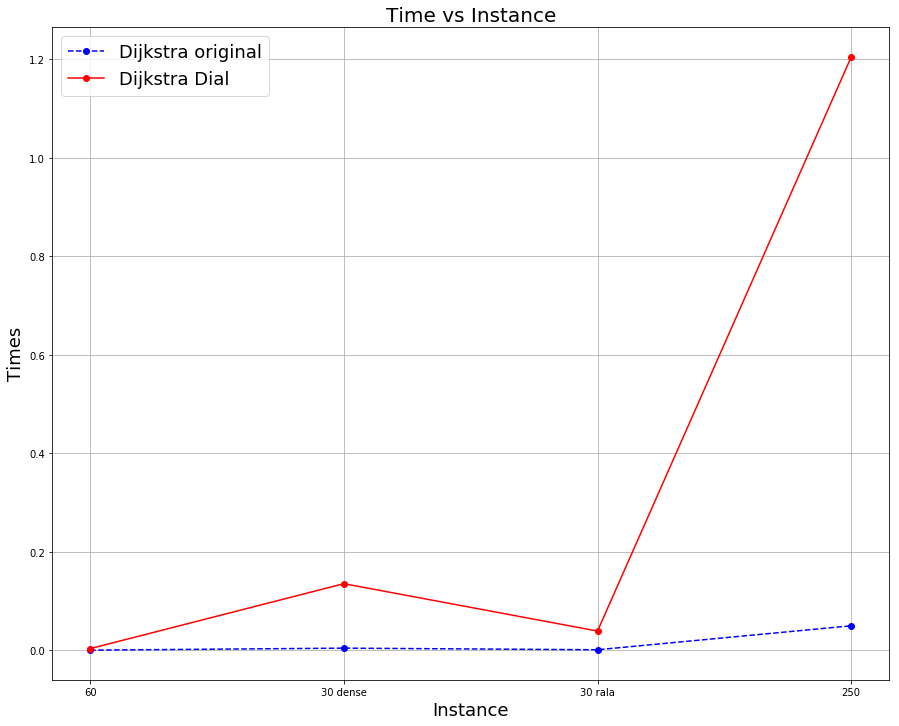

In [74]:
plot(times)

### Conclusiones


Lo esperado al comparar los tiempos de ambos algoritmos es que en el caso de Dijkstra Dial, este sea más rapido que ya que posee una complejidad algoritmica inferior en el peor de los casos, pero tal como se indica también en el enunciado, es en el peor de los casos y no en caso promedio para todas las instancias, las cuales pueden afectar sin duda el desempeño del algoritmo. Además la complejidad del algoritmo Dial viene dada por el parámetro $w$ (max distancia entre nodos $\cdot$ cant de nodos), el cual cuando crece mucho deja de ser tan bueno, lo que quiere decir que este algoritmo debería ser bueno con valores pequeños de $w$. Otro aspecto interesante a mencionar es que dado el algoritmo de dijkstra original, es facil aplicarlo a la matriz de adyacencia mediante operaciones mayoritariamente de la librería numpy, la cual se caracteriza por ser bastante optima además de almacenar sus arreglos en memoria contigua. Por otro lado si bien con Dial se trabajo con numpy, no al nivel que se hizo con Dijkstra original.